# LOGISTIC REGRESSION | ALTERNATIVE LINK

## Load libraries

In [1]:
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.special import expit as invlogit
from scipy.stats import norm

In [2]:
az.style.use("arviz-darkgrid")
np.random.seed(1234)

## Alternative links

In [3]:
def invcloglog(x):
    return 1 - np.exp(-np.exp(x))

In [4]:
x = np.linspace(-5, 5, num=200)

In [5]:
# inverse of the logit function
logit = invlogit(x)

In [6]:
# cumulative density function of standard gaussian
probit = norm.cdf(x)

In [7]:
# inverse of the cloglog function
cloglog = invcloglog(x)

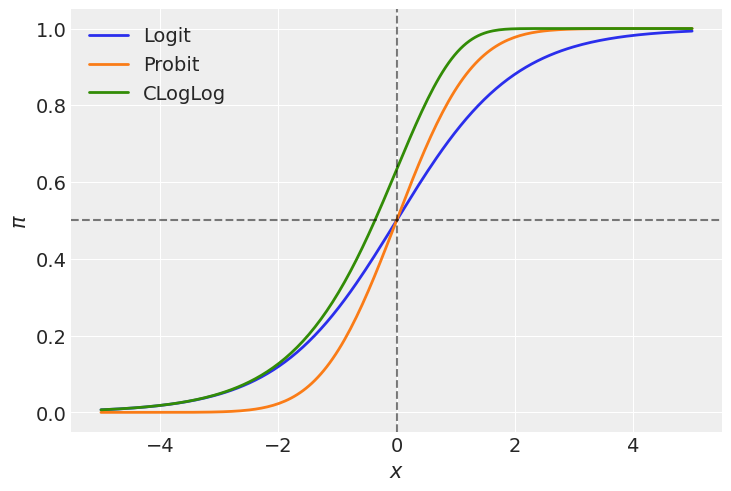

In [8]:
plt.plot(x, logit, color="C0", lw=2, label="Logit")
plt.plot(x, probit, color="C1", lw=2, label="Probit")
plt.plot(x, cloglog, color="C2", lw=2, label="CLogLog")
plt.axvline(0, c="k", alpha=0.5, ls="--")
plt.axhline(0.5, c="k", alpha=0.5, ls="--")
plt.xlabel(r"$x$")
plt.ylabel(r"$\pi$")
plt.legend();

## Load data

In [9]:
x = np.array([1.6907, 1.7242, 1.7552, 1.7842, 1.8113, 1.8369, 1.8610, 1.8839])
n = np.array([59, 60, 62, 56, 63, 59, 62, 60])
y = np.array([6, 13, 18, 28, 52, 53, 61, 60])

data = pd.DataFrame({"x": x, "n": n, "y": y})

## Modeling

In [10]:
formula = "p(y, n) ~ x"

### Logit link

In [11]:
modelLogit = bmb.Model(
                          formula,
                          data,
                          family = 'binomial'
)

In [12]:
idataLogit = modelLogit.fit(draws = 2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, x]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


### Probit link

In [13]:
modelProbit = bmb.Model(
                          formula,
                          data,
                          family = 'binomial',
                          link = 'probit'
)

In [14]:
idataProbit = modelProbit.fit(draws = 2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, x]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


### CLogLog link

In [15]:
modelCloglog = bmb.Model(
                          formula,
                          data,
                          family = 'binomial',
                          link = 'cloglog'
)

In [16]:
idataCloglog = modelCloglog.fit(draws = 2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, x]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 28 seconds.


### Results

In [17]:
def get_predictions(model, idata, seq):
    # Create a data frame with the new data
    new_data = pd.DataFrame({"x": seq})
    
    # Predict probability of dying using out of sample data
    model.predict(idata, data=new_data)
    
    # Get posterior mean across all chains and draws
    mu = idata.posterior["p(y, n)_mean"].mean(("chain", "draw"))
    return mu

In [18]:
x_seq = np.linspace(1.6, 2, num=200)

mu_logit = get_predictions(modelLogit, idataLogit, x_seq)
mu_probit = get_predictions(modelProbit, idataProbit, x_seq)
mu_cloglog = get_predictions(modelCloglog, idataCloglog, x_seq)

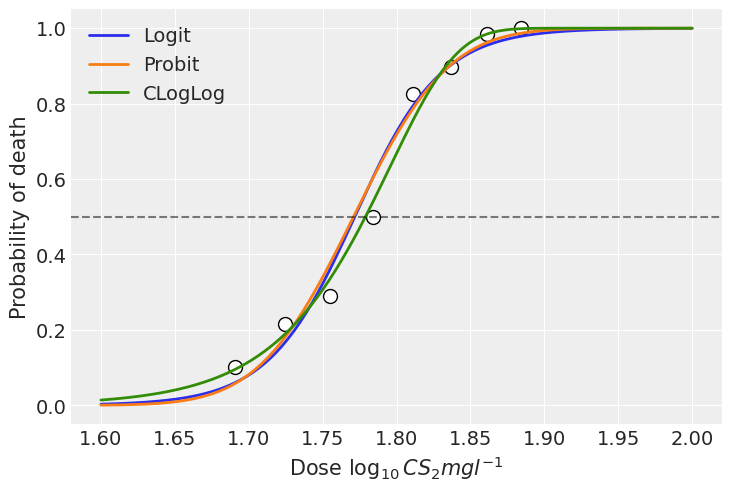

In [19]:
plt.scatter(x, y / n, c = "white", edgecolors = "black", s=100)
plt.plot(x_seq, mu_logit, lw=2, label="Logit")
plt.plot(x_seq, mu_probit, lw=2, label="Probit")
plt.plot(x_seq, mu_cloglog, lw=2, label="CLogLog")
plt.axhline(0.5, c="k", alpha=0.5, ls="--")
plt.xlabel(r"Dose $\log_{10}CS_2mgl^{-1}$")
plt.ylabel("Probability of death")
plt.legend();